# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [1]:
!pip install palmerpenguins
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins
df = load_penguins()
pd.get_dummies(df)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [2]:
df = df.dropna(subset=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "sex"])
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X = df[["bill_length_mm"]]
y = df[["bill_depth_mm"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr = LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)
rsquared1 = r2_score(y_test, pred1)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

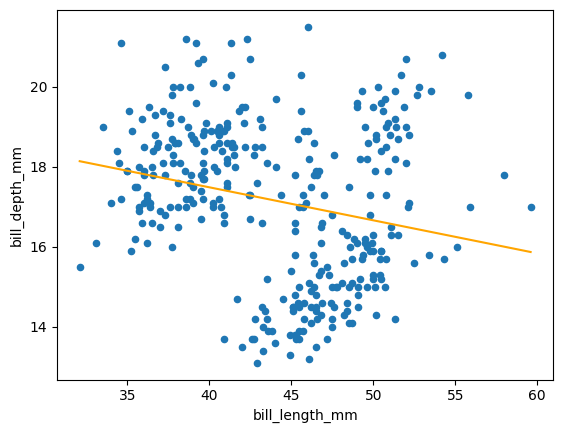

In [9]:
X_new = pd.DataFrame()
X_new["bill_length_mm"] = np.linspace(
    df["bill_length_mm"].min(),
    df["bill_length_mm"].max(),
    num=1000
)

y_new_ = pd.Series(
    lr.predict(X_new).flatten(),
    index=X_new["bill_length_mm"]
)

df.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_.plot.line(c="orange")

In [11]:
X = pd.concat([df["bill_length_mm"], df["bill_length_mm"]**2], axis=1)
y = df[["bill_depth_mm"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr = LinearRegression()
lr.fit(X_train, y_train)
pred2 = lr.predict(X_test)
rsquared2 = r2_score(y_test, pred2)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<Axes: xlabel='0', ylabel='bill_depth_mm'>

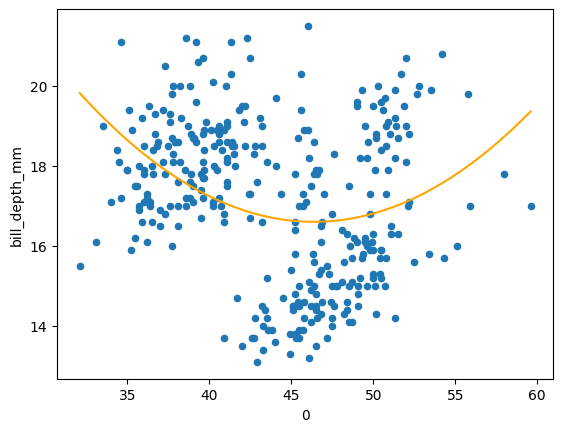

In [13]:
X_new = pd.DataFrame()
X_new[0] = np.linspace(
    df["bill_length_mm"].min(),
    df["bill_length_mm"].max(),
    num=1000
)
X_new[1] = X_new[0]**2

y_new_ = pd.Series(
    lr.predict(X_new).flatten(),
    index=X_new[0]
)

df.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_.plot.line(c="orange")

In [14]:
X = pd.concat([df["bill_length_mm"], df["bill_length_mm"]**2, df["bill_length_mm"]**3], axis=1)
y = df[["bill_depth_mm"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr = LinearRegression()
lr.fit(X_train, y_train)
pred3 = lr.predict(X_test)
rsquared3 = r2_score(y_test, pred3)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<Axes: xlabel='0', ylabel='bill_depth_mm'>

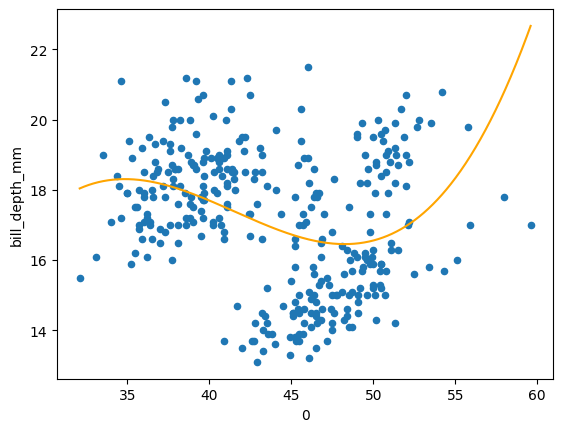

In [15]:
X_new = pd.DataFrame()
X_new[0] = np.linspace(
    df["bill_length_mm"].min(),
    df["bill_length_mm"].max(),
    num=1000
)
X_new[1] = X_new[0]**2
X_new[2] = X_new[0]**3

y_new_ = pd.Series(
    lr.predict(X_new).flatten(),
    index=X_new[0]
)

df.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_.plot.line(c="orange")

In [16]:
X = pd.concat([df["bill_length_mm"], df["bill_length_mm"]**2, df["bill_length_mm"]**3, df["bill_length_mm"]**4, df["bill_length_mm"]**5, df["bill_length_mm"]**6, df["bill_length_mm"]**7, df["bill_length_mm"]**8, df["bill_length_mm"]**9,
               df["bill_length_mm"]**10], axis=1)
y = df[["bill_depth_mm"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr = LinearRegression()
lr.fit(X_train, y_train)
pred10 = lr.predict(X_test)
rsquared10 = r2_score(y_test, pred10)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<Axes: xlabel='0', ylabel='bill_depth_mm'>

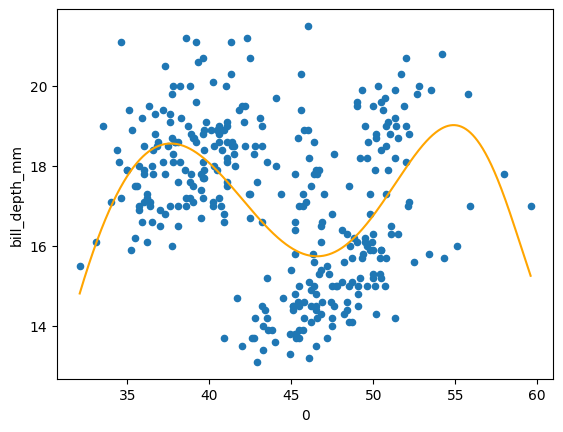

In [17]:
X_new = pd.DataFrame()
X_new[0] = np.linspace(
    df["bill_length_mm"].min(),
    df["bill_length_mm"].max(),
    num=1000
)

X_new[1] = X_new[0]**2
X_new[2] = X_new[0]**3
X_new[3] = X_new[0]**4
X_new[4] = X_new[0]**5
X_new[5] = X_new[0]**6
X_new[6] = X_new[0]**7
X_new[7] = X_new[0]**8
X_new[8] = X_new[0]**9
X_new[9] = X_new[0]**10

y_new_ = pd.Series(
    lr.predict(X_new).flatten(),
    index=X_new[0]
)

df.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_.plot.line(c="orange")

In [18]:
print(rsquared1, rsquared2, rsquared3, rsquared10)

0.06453004225387016 0.1236945203435833 0.08750588853191588 0.2769927978235657


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of the models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

*   Simple linear regression because there's clearly a non-linear relationship in the data.
*   Degree 10 polynomial model because the model is clearly fit to noise in the training set.
*   Quadratic and cubic models because the models capture the non-linear curved relationship in the data without overfitting to noise.